In [62]:
import pandas as pd
import community
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df_emails = pd.read_csv('hillary-clinton-emails/emails.csv')
df_aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
df_emails_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [72]:
edges = []
for index, row in df_emails.iterrows():
    emailId, senderId = row[['Id', 'SenderPersonId']]
    
    receiversId = []
    for index, row in df_emails_receivers[df_emails_receivers['EmailId'] == emailId].iterrows():
        receiversId.append(df_aliases[df_aliases['PersonId'] == row['PersonId']]['PersonId'].iloc[0])
    if(np.isnan(senderId)):
        senderId = -1
        
    edges.append(((int)(senderId), receiversId))
edges

[(87, [80]),
 (-1, [80]),
 (32, [228, 80]),
 (32, [80]),
 (80, [81]),
 (80, [185]),
 (32, [80]),
 (80, [81]),
 (87, [80]),
 (-1, [80]),
 (87, [80]),
 (-1, [80]),
 (87, [80]),
 (10, [80]),
 (32, [80]),
 (77, [80]),
 (213, [80, 32, 229, 170, 87]),
 (213, [80, 32, 230, 231]),
 (87, [80]),
 (87, [213]),
 (80, [87]),
 (80, [185]),
 (80, [185, 232]),
 (80, [87]),
 (87, [80]),
 (194, [80]),
 (87, [80]),
 (32, [80]),
 (21, [80]),
 (81, [80]),
 (87, [80]),
 (32, [80]),
 (-1, [80]),
 (80, [185]),
 (87, [80]),
 (32, []),
 (185, [80]),
 (32, [80]),
 (81, [80]),
 (32, [80, 163, 22]),
 (87, [80]),
 (22, [163, 32]),
 (80, [160, 233]),
 (80, [87]),
 (32, [80]),
 (87, [80]),
 (194, [80]),
 (80, [87]),
 (80, [234, 87]),
 (22, [163, 32, 32]),
 (87, [80]),
 (10, [80]),
 (194, [80]),
 (194, [80]),
 (216, [80]),
 (80, [235, 87]),
 (32, [80]),
 (87, [80]),
 (87, [80]),
 (32, [80]),
 (10, [80]),
 (80, [185]),
 (32, [80]),
 (87, [80]),
 (32, [80]),
 (80, [87]),
 (87, [80]),
 (80, [185]),
 (87, [80]),
 (194, [8

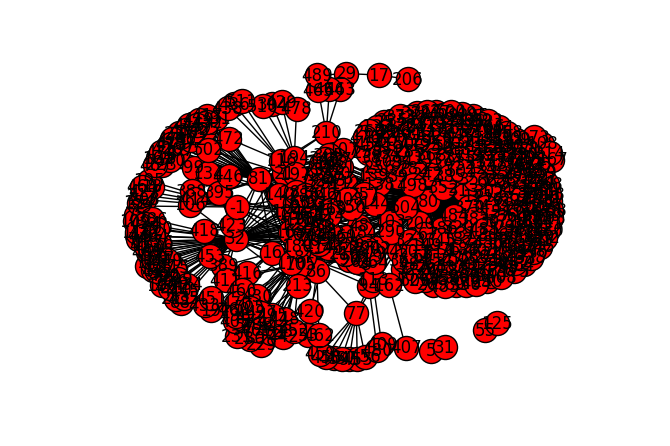

In [73]:
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.Graph()

for sender, receivers in edges:
    for receiver in receivers:
        G.add_edge(sender, receiver)

nx.draw(G, with_labels=True)
#Now only add labels to the nodes you require (the hubs in my case)
plt.show()

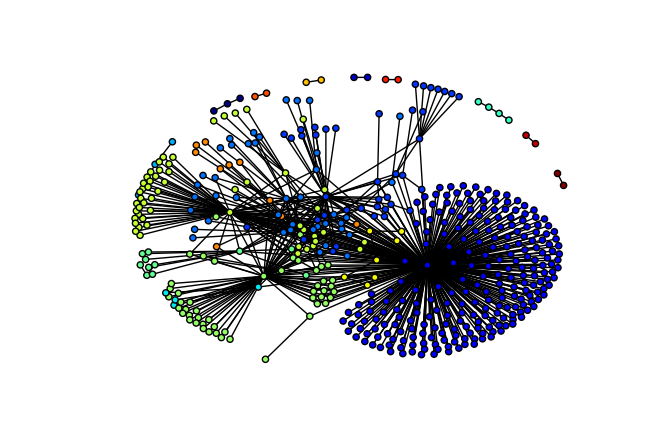

In [88]:
#first compute the best partition
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 20, with_labels=False)
plt.show()